# Importing necessary libraries


In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# 1.Data Collection

In [5]:
data = pd.read_csv("D:\CPH2401\egypt_education_dataset.csv")

In [6]:
data

,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10
0,Allison Lang,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678
1,Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158
2,Melissa Lee,16,Year 10,NaN,PhD,IB,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634
3,Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706
4,Eric Steele,17,Year 11,PhD,NaN,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Bruce Vargas,15,Year 11,NaN,Master,IB,84.760901,96.154122,71.428657,52.579123,62.243286,63.188827,93.744022,72.375436,77.848848,66.807401
49996,Clarence Foley,16,Year 11,NaN,PhD,IGCSE,82.196281,84.939252,56.661299,88.210451,84.573156,73.009089,68.842074,76.605868,76.255564,80.606913
49997,Dawn Palmer,14,Year 10,PhD,PhD,Thanweya,90.035457,30.790153,64.771808,82.749067,52.774571,65.665893,74.760145,74.148929,64.687866,86.811651
49998,Albert Berry,15,Year 10,PhD,Bachelor,Thanweya,58.177784,81.879862,86.309918,100.000000,77.616452,89.898231,62.805221,57.548277,70.028551,80.779414


 # 2.Data Cleaning/Preprocessing


In [7]:
# Check for null values

print(data.isnull().sum())

Student Name          0
Student Age           0
Student year          0
Father Degree     10040
Mother Degree     10090
Education Type        0
Subject_1             0
Subject_2             0
Subject_3             0
Subject_4             0
Subject_5             0
Subject_6             0
Subject_7             0
Subject_8             0
Subject_9             0
Subject_10            0
dtype: int64


In [8]:
# Handle missing data (if needed)

data.fillna(method='ffill', inplace=True) 


In [9]:
# Convert categorical data into numerical using LabelEncoder or pd.get_dummies()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

- Target Variable

In [10]:
# Assuming 'Education Type' is the target variable

data['Education Type'] = label_encoder.fit_transform(data['Education Type'])
data['Father Degree'] = label_encoder.fit_transform(data['Father Degree'])
data['Mother Degree'] = label_encoder.fit_transform(data['Mother Degree'])
data['Student year'] = label_encoder.fit_transform(data['Student year'])

# 3.Data Visualization (Exploratory Data Analysis)

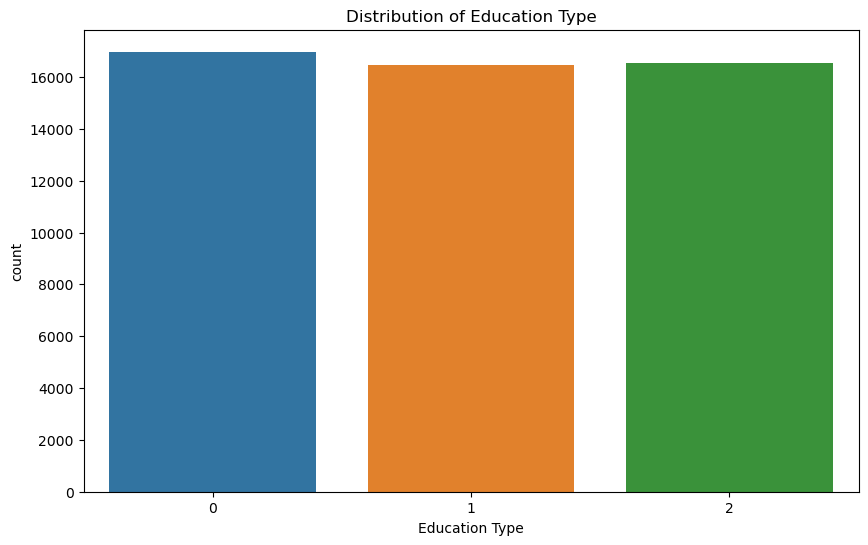

   Student Age  Student year  Father Degree  Mother Degree  Education Type  \
0           18             3              1              1               0   
1           14             3              0              3               0   
2           16             0              0              3               0   
3           14             0              0              0               2   
4           17             1              3              0               1   

    Subject_1   Subject_2  Subject_3  Subject_4  Subject_5  Subject_6  \
0   72.236740   85.931149  65.698513  84.163844  78.179414  50.578209   
1   91.603078   73.186427  64.240239  47.786542  83.138581  66.913702   
2  100.000000   83.985923  89.378162  82.446853  86.368818  90.347020   
3   91.082131  100.000000  78.802220  78.447670  64.606239  82.045421   
4   74.906144   69.518146  65.284841  56.317028  69.758140  85.810641   

    Subject_7  Subject_8  Subject_9  Subject_10  
0   70.071681  80.294509  72.709741   59.0

In [15]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Education Type', data=data)
plt.title('Distribution of Education Type')
plt.show()

# Ensure that all necessary columns are numeric for correlation
# You can use the select_dtypes method to select only numeric columns

numeric_data = data.select_dtypes(include=[np.number])

# Check the numeric data

print(numeric_data.head())



- Correlation heatmap

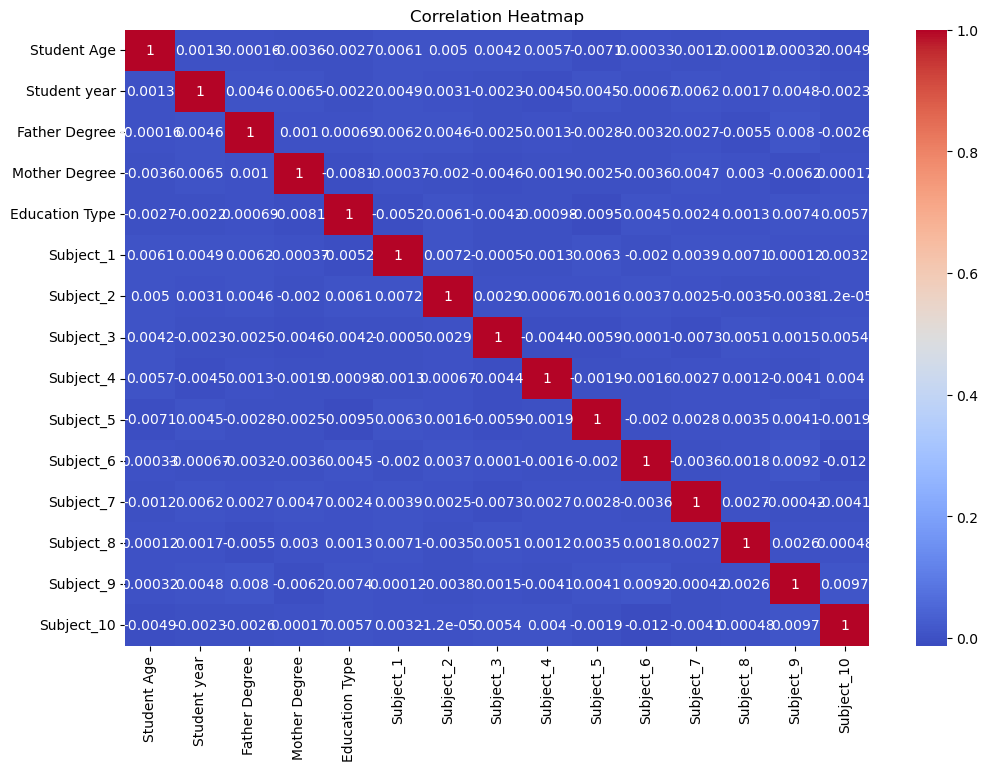

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4.Feature Engineering/Selection

In [25]:
X = data.drop(columns=['Student Name', 'Education Type'])  # Features

y = data['Education Type']  # Target

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5.models (Logistic Regression, Random Forest, Decision Tree)


In [18]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# 6.Training the models

In [19]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model_name} Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
    print(f"{model_name} Classification Report:\n {classification_report(y_test, y_pred)}")

C:\Users\jathi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.3373
Logistic Regression Confusion Matrix:
 [[2598  845 1724]
 [2478  761 1698]
 [2399  797 1700]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.50      0.41      5167
           1       0.32      0.15      0.21      4937
           2       0.33      0.35      0.34      4896

    accuracy                           0.34     15000
   macro avg       0.33      0.33      0.32     15000
weighted avg       0.33      0.34      0.32     15000

Random Forest Accuracy: 0.3319
Random Forest Confusion Matrix:
 [[1872 1695 1600]
 [1883 1509 1545]
 [1806 1493 1597]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.36      0.35      5167
           1       0.32      0.31      0.31      4937
           2       0.34      0.33      0.33      4896

    accuracy                           0.33     15000
   macro avg   

# Evaluating the models

# 8.Hyperparameter Tuning and Optimization (using GridSearchCV)
- Hyperparameters for each model

In [20]:
param_grids = {
    "Logistic Regression": {"C": [0.1, 1, 10], "solver": ['liblinear']},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
    "Decision Tree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5]}
}


In [21]:

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best {model_name} Model: {grid_search.best_estimator_}")
    print(f"Best {model_name} Params: {grid_search.best_params_}")
    print(f"Best {model_name} Score: {grid_search.best_score_}")


Best Logistic Regression Model: LogisticRegression(C=0.1, max_iter=200, solver='liblinear')
Best Logistic Regression Params: {'C': 0.1, 'solver': 'liblinear'}
Best Logistic Regression Score: 0.33099999999999996
Best Random Forest Model: RandomForestClassifier(max_depth=20, n_estimators=200)
Best Random Forest Params: {'max_depth': 20, 'n_estimators': 200}
Best Random Forest Score: 0.33680000000000004
Best Decision Tree Model: DecisionTreeClassifier(max_depth=10)
Best Decision Tree Params: {'max_depth': 10, 'min_samples_split': 2}
Best Decision Tree Score: 0.3368571428571429


# 9 Predictions using the best model

In [23]:
best_model = best_models['Logistic Regression']  # You can choose any model
y_pred_best = best_model.predict(X_test)
print(f"Best Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Best Logistic Regression Confusion Matrix:\n {confusion_matrix(y_test, y_pred_best)}")

Best Logistic Regression Accuracy: 0.3360
Best Logistic Regression Confusion Matrix:
 [[2632  782 1753]
 [2540  689 1708]
 [2456  721 1719]]


# 10. best model using Pickle

In [24]:
with open('best_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_logistic_regression_model.pkl'")


Best model saved as 'best_logistic_regression_model.pkl'
